# Multinomial Logistic Regression (Multiclass Classification)
Logistic Regression, unlike its name, is a classification model. It is a linear-based model that follows the linear equation in (1) to predict values:

$\begin{equation}
    z = \omega x + b,
\end{equation}$

where $\omega$ is the weight of the model, $x$ represents the independent data, and $b$ shows the bias.

In multiclasses, it is assumed that there are $C$ classes. Thus, for each datapoint $x_{i}\in X$, where $X$ is the set of datapoints, the output $z_{i}$ is fed into the softmax function to predict the corresponding probability, i.e., the probability that $z_{i}$ belongs to class $c\in C$. Therefore, we have

$\begin{equation}
    \hat{z_{i}} = \frac{exp(z_{i})}{\sum_{c = 1}^{C} exp(z_{c})}
\end{equation}$

Assuming that our data is Independent and Identically Distributed (IID), the loss for a single datapoint is given by

$\begin{equation}
\mathcal{L} = -\sum_{c = 1}^{C}y_{c}\log(z_{c})
\end{equation}$

## How to Implement LogisticRegression for Binary Classification
We use stochastic gradient descent (SGD) to train the model. Hence, assuming a learning rate of $\alpha$ and the maximum number of iterations $n\_iters$, we

1. initialize the weigths as zero
2. initialize the bias as zero
3. calculate $\frac{\partial z}{\partial\omega}$
4. calculate $\frac{\partial z}{\partial b}$
5. update weights as $\omega = \omega - \alpha.\frac{\partial z}{\partial\omega}$
6. update bias as $b = b - \alpha.\frac{\partial z}{\partial b}$
7. repeat steps 3 - 6 for $n\_iters$ times

For the inference part, we use the updated weights and bias in Eq. (2) and calculate the labels using $\textit{argmax}$ function.

## Define the Manual Model

### Import Required Libraries

In [1]:
import numpy as np
import warnings

# suppress warnings
warnings.filterwarnings('ignore')

### Define Required Functions

In [2]:
def softmax(x):
    exp_x = np.exp(x - x.max(axis=1, keepdims=True))   # to avoid overflow
    return exp_x/exp_x.sum(axis=1, keepdims=True)

### LogisticRegression Class

In [3]:
class logisticRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        self.weights = np.zeros((n_features, n_classes))
        self.bias = np.zeros((1, n_classes))

        y_one_hot = np.eye(n_classes)[y]

        for iter in range(self.n_iters):
            z = np.dot(X, self.weights) + self.bias
            predictions = softmax(z)

            dw = np.dot(X.T, (predictions - y_one_hot)) / n_samples
            db = np.sum(predictions - y_one_hot, axis=0, keepdims=True) / n_samples

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            loss = -np.mean(np.sum(y_one_hot * np.log(predictions + 1e-15), axis=1))
            self.losses.append(loss)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = softmax(z)

        return np.argmax(y_pred, axis=1)

## Train and Inference

### Import Required Libraries

In [4]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Define Required Functions

In [5]:
def plot(data_df, title):
    dict_species = {
        0: 'setosa',
        1: 'versicolor',
        2: 'virginica'
    }

    for idx, (species_id, species_name) in enumerate(dict_species.items()):
        species_data = data_df[data_df['target'] == species_id]
        plt.scatter(
            species_data['sepal length (cm)'], 
            species_data['petal length (cm)'], 
            label=species_name,
            color=['r', 'g', 'b'][idx]
        )

    plt.xlabel('Sepal Length')
    plt.ylabel('Petal Length')
    plt.legend()
    plt.title(title)
    plt.show()

In [6]:
def plot_loss(losses, title):
    x = [i for i in range(len(losses))]
    plt.Figure(figsize=(12, 6))
    plt.plot(x, losses, linewidth=2)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title(title)
    plt.show()

### Import Data

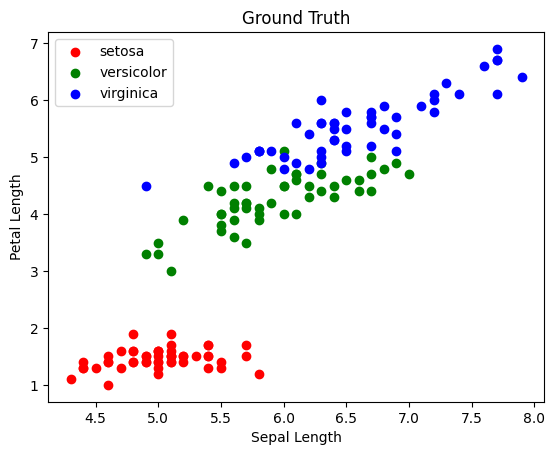

In [7]:
dataset = datasets.load_iris()
X, y = dataset.data, dataset.target

# plot data
df = pd.DataFrame(X, columns=dataset.feature_names)
df['target'] = y
plot(df, "Ground Truth")

### Train-Test Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# normalize as the range of values in the iris dataset varies significantly
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

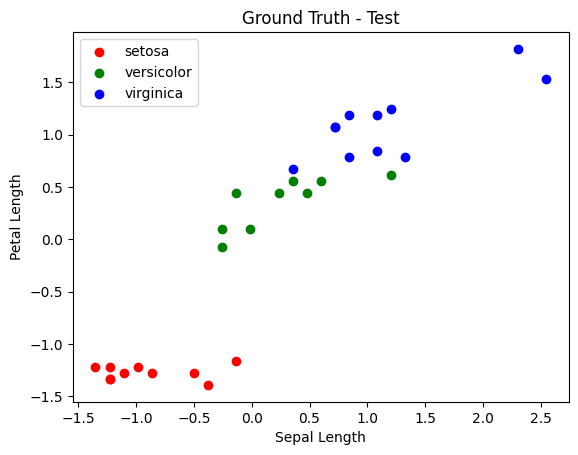

In [9]:
# plot the results
df_test = pd.DataFrame(X_test, columns=dataset.feature_names)
df_test['target'] = y_test

plot(df_test, "Ground Truth - Test")

### Implement Manual LogisticRegression

In [10]:
# train
clf_logr = logisticRegression()
clf_logr.fit(X_train, y_train)

# inference
y_pred = clf_logr.predict(X_test)

# evaluations
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy of Predictions with lr = {clf_logr.lr}: {accuracy}")

Accuracy of Predictions with lr = 0.001: 0.8666666666666667


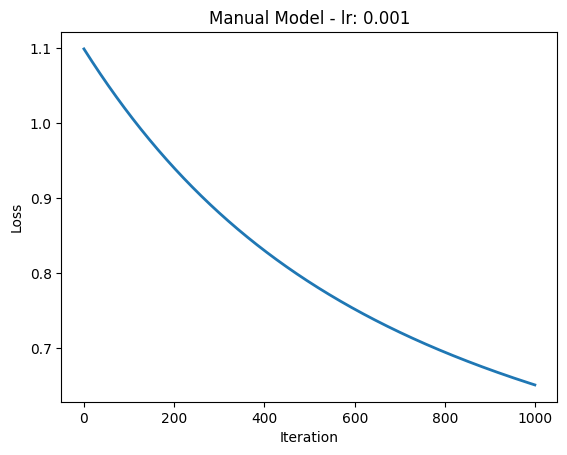

In [11]:
# plot loss
plot_loss(clf_logr.losses, f'Manual Model - lr: {clf_logr.lr}')

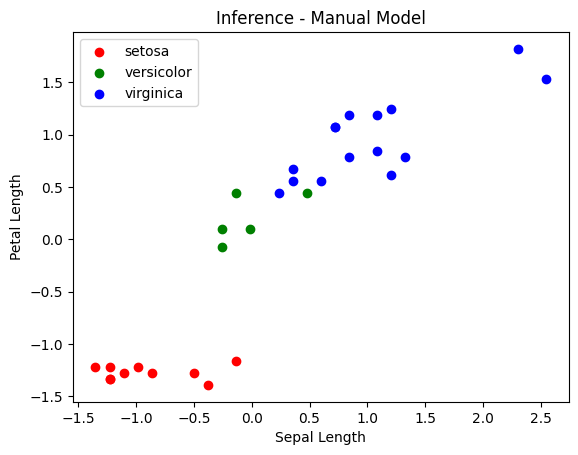

In [12]:
df_pred = pd.DataFrame(X_test, columns=dataset.feature_names)
df_pred['target'] = y_pred

plot(df_pred, "Inference - Manual Model")

#### Different Learning Rates - lr = 0.01

In [13]:
# train
clf_logr_lr_001 = logisticRegression(lr=0.01)
clf_logr_lr_001.fit(X_train, y_train)

# inference
y_pred_001 = clf_logr_lr_001.predict(X_test)

# evaluations
accuracy_001 = np.mean(y_pred_001 == y_test)
print(f"Accuracy of Predictions with lr = {clf_logr_lr_001.lr}: {accuracy_001}")

Accuracy of Predictions with lr = 0.01: 0.9666666666666667


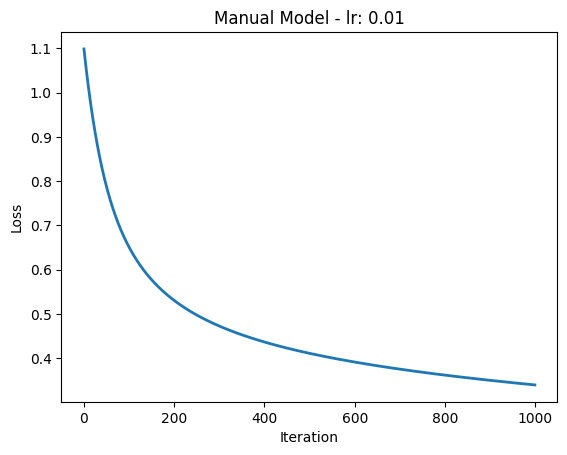

In [14]:
# plot loss
plot_loss(clf_logr_lr_001.losses, f'Manual Model - lr: {clf_logr_lr_001.lr}')

#### Different Learning Rates - lr = 0.1

In [15]:
# train
clf_logr_lr_01 = logisticRegression(lr=0.1)
clf_logr_lr_01.fit(X_train, y_train)

# inference
y_pred_01 = clf_logr_lr_01.predict(X_test)

# evaluations
accuracy_01 = np.mean(y_pred_01 == y_test)
print(f"Accuracy of Predictions with lr = {clf_logr_lr_01.lr}: {accuracy_01}")

Accuracy of Predictions with lr = 0.1: 1.0


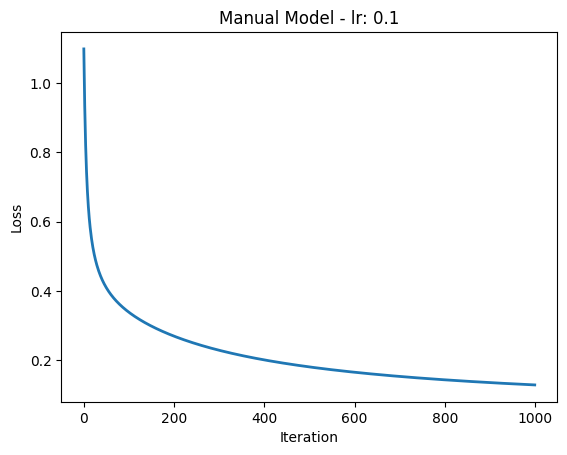

In [16]:
# plot loss
plot_loss(clf_logr_lr_01.losses, f'Manual Model - lr: {clf_logr_lr_01.lr}')

#### Different Learning Rates - lr = 0.05

In [17]:
# train
clf_logr_lr_005 = logisticRegression(lr=0.05)
clf_logr_lr_005.fit(X_train, y_train)

# inference
y_pred_005 = clf_logr_lr_005.predict(X_test)

# evaluations
accuracy_005 = np.mean(y_pred_005 == y_test)
print(f"Accuracy of Predictions with lr = {clf_logr_lr_005.lr}: {accuracy_005}")

Accuracy of Predictions with lr = 0.05: 1.0


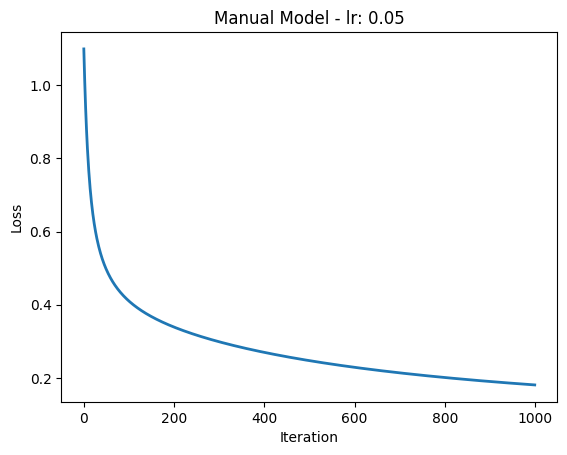

In [18]:
# plot loss
plot_loss(clf_logr_lr_005.losses, f'Manual Model - lr: {clf_logr_lr_005.lr}')

## Compare with Sklearn LogisticRegression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
# train
clf_logr_sklearn = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
clf_logr_sklearn.fit(X_train, y_train)

# inference
preds = clf_logr_sklearn.predict(X_test)

#evaluations
accuracy_sklearn = np.mean(preds == y_test)

print(f"Accuracy of Sklearn Predictions with tolerate = {clf_logr_sklearn.tol}: {accuracy_sklearn}")

Accuracy of Sklearn Predictions with tolerate = 0.0001: 1.0


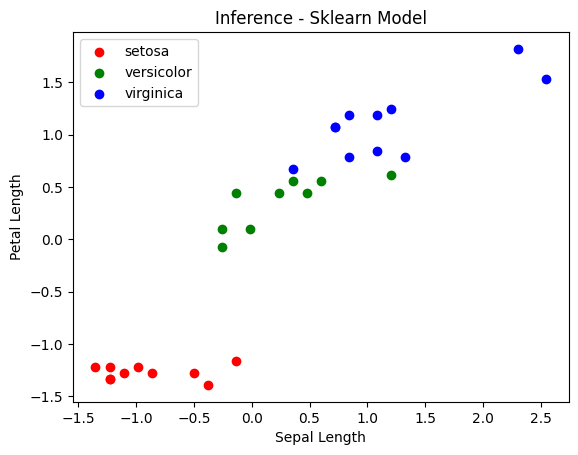

In [21]:
df_pred_sklearn = pd.DataFrame(X_test, columns=dataset.feature_names)
df_pred_sklearn['target'] = preds

plot(df_pred_sklearn, "Inference - Sklearn Model")